In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Final_Data.csv')

In [3]:
df

,Season_fifa,short_name,age,dob,height_cm,weight_kg,club_name,league_name,overall,potential,...,CL,ECL,PUNCH,ALB,ATB,LMT,TOFF,BCM,BCS,ATTDR
0,2015/16,Cristiano Ronaldo,31,1985-02-05,185,80,Real Madrid CF,Spain Primera Division,94,94,...,15,15,0,12,0,0,50,27,24,92
1,2015/16,L. Messi,29,1987-06-24,170,72,FC Barcelona,Spain Primera Division,93,93,...,0,0,0,117,34,0,10,18,17,190
2,2015/16,M. Neuer,30,1986-03-27,193,92,FC Bayern München,German 1. Bundesliga,92,92,...,16,10,8,179,0,0,0,0,0,1
3,2015/16,L. Suárez,29,1987-01-24,182,85,FC Barcelona,Spain Primera Division,92,92,...,18,18,0,23,5,0,59,29,34,117
4,2015/16,Neymar,24,1992-02-05,174,68,FC Barcelona,Spain Primera Division,92,95,...,1,1,0,64,9,0,24,30,20,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,2020/21,R. Finnigan,17,2003-09-23,178,69,Southampton,English Premier League,55,73,...,0,0,0,0,0,0,0,0,0,0
9740,2020/21,N. Noll,18,2003-03-17,188,75,TSG Hoffenheim,German 1. Bundesliga,55,72,...,0,0,0,0,0,0,0,0,0,0
9741,2020/21,K. Urbański,16,2004-09-07,178,58,Bologna,Italian Serie A,54,79,...,0,0,0,1,0,0,0,0,0,0
9742,2020/21,P. Boer,19,2002-05-12,193,80,Roma,Italian Serie A,54,74,...,1,1,0,2,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9744 entries, 0 to 9743
Columns: 106 entries, Season_fifa to ATTDR
dtypes: float64(5), int64(92), object(9)
memory usage: 7.9+ MB


In [5]:
df.columns.tolist()

['Season_fifa',
 'short_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_name',
 'league_name',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'release_clause_eur',
 'nation_position',
 'nation_jersey_number',
 'previous_edition_overall',
 'POS',
 'GP',
 'MIN',
 'ST',
 'ON',
 'OFF',
 'Y',
 'YR',
 'R',
 'G',
 'A',
 'SA',
 'AOP',
 'ASP',
 'S',
 'SOG',
 'INT',
 'CR',
 'ACR',
 'CC',
 'BCC',
 'CCOP',
 'CCSP',
 'BLK',
 'TKL',
 'TKLW',
 'FC',
 'FS',
 'P',
 'AP',
 'ACRO',
 'AW',
 'BR',
 'DR',
 'DW',
 'EG',
 'ES',
 'IBS',
 'IBSOG',
 'IBG',
 'OBS',
 'OBSOG',
 'OBG',
 'AOG',
 'APW',
 'DSP',
 'OWN',
 'TOUCH',
 'TBOX',
 'PFT',
 'DL',
 'AFZP',
 'BLKCR',
 'PENT',
 'CLROL',
 'POSL',
 'LPOPP',
 'PK',
 'PKG',
 'PKM',
 'PKSVD',
 'FKCR',
 'FKACR',
 'CRN',
 'CRNCR',
 'CRNW',
 'FKS',
 'FKSOG',
 'FKG',
 'GC',
 'CS',
 'SV',
 'IBSV',
 'OBSV',
 'AKS',
 'PKC',
 'PKF',
 'PKSV',
 'CL',
 'ECL',
 'PUNCH',
 'ALB',
 'ATB',
 'LMT',
 'TOFF',
 'BCM',
 'BCS',
 'ATTDR

## Player's Physical Attributes

### Age
- Relevant predictor

In [6]:
df['age'].isna().sum() # no nulls

0

In [7]:
df['age'].dtypes # integer

dtype('int64')

<AxesSubplot:xlabel='age', ylabel='Density'>

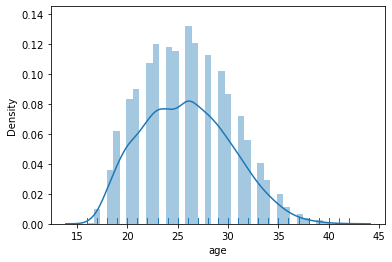

In [8]:
sns.distplot(df['age'],hist=True,kde=True,rug=True)

### Date of Birth

- Irrelevant, substituted by other relevant proxy `Age`
- Drop

In [9]:
df.drop(['dob'],axis=1,inplace=True)

### Height (cm)
- Relevant predictor

In [10]:
df['height_cm'].isna().sum() # no nulls

0

In [11]:
df['height_cm'].dtypes # integer

dtype('int64')

<AxesSubplot:xlabel='height_cm', ylabel='Density'>

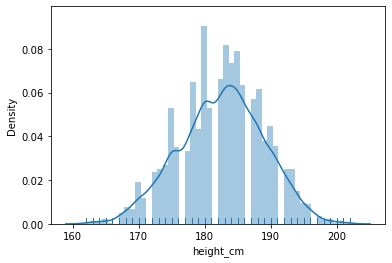

In [12]:
sns.distplot(df['height_cm'],hist=True,kde=True,rug=True)

### Weight (kg)
- Relevant predictor

In [13]:
df['weight_kg'].isna().sum() # no nulls

0

In [14]:
df['weight_kg'].dtypes # integer

dtype('int64')

<AxesSubplot:xlabel='weight_kg', ylabel='Density'>

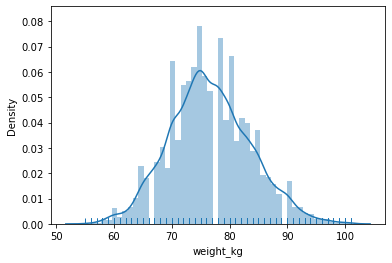

In [15]:
sns.distplot(df['weight_kg'],hist=True,kde=True,rug=True)

### Club Name
- Relevant predictor
- Label-encoded

In [16]:
df['club_name'].isna().sum() # no nulls

0

In [17]:
df['club_name'].dtypes # object/categorical

dtype('O')

In [18]:
df['club_name'].value_counts()

Newcastle United            157
Everton                     143
TSG Hoffenheim              143
Athletic Club de Bilbao     138
FC Girondins de Bordeaux    136
                           ... 
SC Paderborn 07               2
SpVgg Greuther Fürth          2
Brescia                       2
Cardiff City                  1
Clermont Foot 63              1
Name: club_name, Length: 142, dtype: int64

In [19]:
le = preprocessing.LabelEncoder()
df['club_name'] = df[['club_name']].apply(le.fit_transform)
df['club_name'].value_counts()

80     157
123    143
42     143
13     138
46     136
      ... 
113      2
20       2
133      2
29       1
26       1
Name: club_name, Length: 142, dtype: int64

<AxesSubplot:xlabel='club_name', ylabel='Density'>

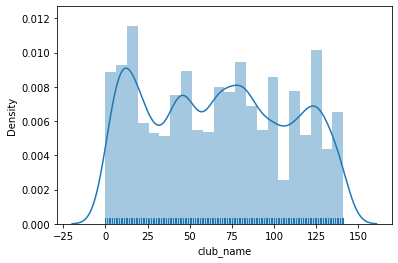

In [20]:
sns.distplot(df['club_name'],hist=True,kde=True,rug=True)

### League Name
- Relevant predictor
- Label-encoded

In [21]:
df['league_name'].isna().sum() # no nulls

0

In [22]:
df['league_name'].dtypes # object/categorical

dtype('O')

In [23]:
df['league_name'].value_counts()

French Ligue 1            2096
Italian Serie A           2034
English Premier League    2005
German 1. Bundesliga      1837
Spain Primera Division    1772
Name: league_name, dtype: int64

In [24]:
df['league_name'] = df[['league_name']].apply(le.fit_transform)
df['league_name'].value_counts()

1    2096
3    2034
0    2005
2    1837
4    1772
Name: league_name, dtype: int64

### Overall
- FIFA ranking
- Predicted variable

In [25]:
df['overall'].isna().sum() # no nulls

0

In [26]:
df['overall'].dtypes # integer

dtype('int64')

<AxesSubplot:xlabel='overall', ylabel='Density'>

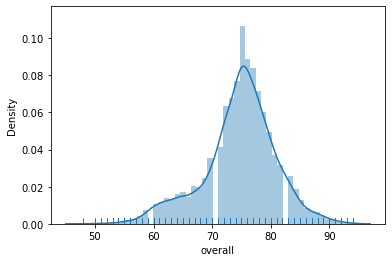

In [27]:
sns.distplot(df['overall'],hist=True,kde=True,rug=True)

### Potential
- Potential FIFA ranking
- Irrelevant variable (only an estimate of the ranking)
- Drop

In [28]:
df['potential'].isna().sum() # no nulls

0

In [29]:
df['potential'].dtypes # integer

dtype('int64')

<AxesSubplot:xlabel='potential', ylabel='Density'>

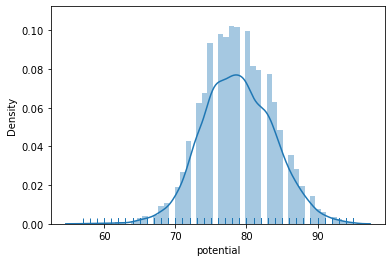

In [30]:
sns.distplot(df['potential'],hist=True,kde=True,rug=True)

In [31]:
df.drop(['potential'],axis=1,inplace=True)

### Value (EUR)
- Relevant predictor
- Imputation required

In [32]:
df['value_eur'].isna().sum() # imputation required

9

In [33]:
df['value_eur'].dtypes # to convert to integer later

dtype('float64')

<AxesSubplot:xlabel='value_eur', ylabel='Density'>

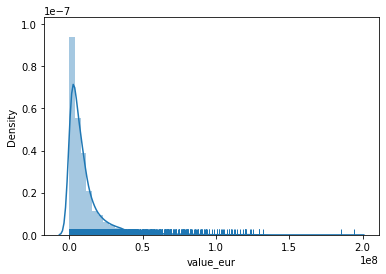

In [34]:
sns.distplot(df['value_eur'].dropna(),hist=True,kde=True,rug=True)

In [35]:
df[['Season_fifa','club_name','short_name', 'value_eur']][df['value_eur'].isna()]

,Season_fifa,club_name,short_name,value_eur
369,2015/16,77,Hilton,NaN
380,2015/16,78,Weligton,NaN
690,2015/16,139,G. McAuley,NaN
809,2015/16,28,D. Dainelli,NaN
924,2015/16,117,N. Seube,NaN
1359,2015/16,28,G. Sardo,NaN
3557,2017/18,77,Hilton,NaN
5176,2018/19,77,Hilton,NaN
6876,2019/20,77,Hilton,NaN


In [36]:
# Reference: https://www.transfermarkt.us/
# Rate used: EUR:USD = 1.00:1.11

# Vitorino Hilton
df['value_eur'][df.index==369] = 275000/1.11
df['value_eur'][df.index==3557] = 275000/1.11
df['value_eur'][df.index==5176] = 275000/1.11
df['value_eur'][df.index==6876] =110000/1.11

# Weligton
df['value_eur'][df.index==380] = 1100000/1.11

# Gareth McAuley
df['value_eur'][df.index==690] = 550000/1.11

# Dario Dainelli
df['value_eur'][df.index==809] = 330000/1.11

# Nicolas Seube
df['value_eur'][df.index==924] = 275000/1.11

# Gennaro Sardo
df['value_eur'][df.index==1359] = 110000/1.11

In [37]:
# check null (supposed to be 0)
df['value_eur'].isna().sum()

0

In [38]:
# convert to integer
df['value_eur'] = df['value_eur'].astype('int')
df['value_eur'].dtypes

dtype('int64')

### Wage (EUR)
- Relevant predictor

In [39]:
df['wage_eur'].isna().sum() # no nulls

0

In [40]:
df['wage_eur'].dtypes # to convert to integer later

dtype('float64')

<AxesSubplot:xlabel='wage_eur', ylabel='Density'>

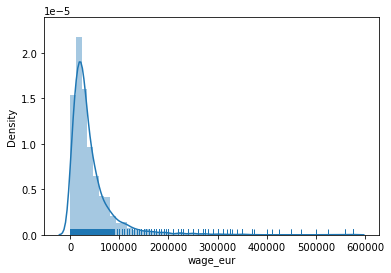

In [41]:
sns.distplot(df['wage_eur'],hist=True,kde=True,rug=True)

In [42]:
# convert to integer
df['wage_eur'] = df['wage_eur'].astype('int')
df['wage_eur'].dtypes

dtype('int64')

### Player Positions
- Relevant predictor
- One-hot-encoded (since one player can have multiple values)
- Create new variable `num_player_positions` to count the number of positions
- Drop original `player_positions` after that

In [43]:
df['player_positions'].isna().sum() # no nulls

0

In [44]:
df['player_positions'].dtypes # object/categorical variable

dtype('O')

In [45]:
df['player_positions'].unique().tolist()[0:10]

['LW, LM, ST',
 'RW',
 'GK',
 'ST',
 'LW',
 'CB',
 'CAM, LW',
 'CM, CDM',
 'CM',
 'RB, CDM, CM']

In [46]:
print(len(df['player_positions'].str.split(', ').explode().unique()))
df['player_positions'].str.split(', ').explode().unique()

15


array(['LW', 'LM', 'ST', 'RW', 'GK', 'CB', 'CAM', 'CM', 'CDM', 'RB', 'RM',
       'CF', 'LB', 'RWB', 'LWB'], dtype=object)

In [47]:
df['posit_LW'] = np.where(df['player_positions'].str.contains('LW'),1,0)
df['posit_LM'] = np.where(df['player_positions'].str.contains('LM'),1,0)
df['posit_ST'] = np.where(df['player_positions'].str.contains('ST'),1,0)
df['posit_GK'] = np.where(df['player_positions'].str.contains('GK'),1,0)
df['posit_CB'] = np.where(df['player_positions'].str.contains('CB'),1,0)
df['posit_CM'] = np.where(df['player_positions'].str.contains('CM'),1,0)
df['posit_CDM'] = np.where(df['player_positions'].str.contains('CDM'),1,0)
df['posit_CAM'] = np.where(df['player_positions'].str.contains('CAM'),1,0)
df['posit_RM'] = np.where(df['player_positions'].str.contains('RM'),1,0)
df['posit_LB'] = np.where(df['player_positions'].str.contains('LB'),1,0)
df['posit_RW'] = np.where(df['player_positions'].str.contains('RW'),1,0)
df['posit_RB'] = np.where(df['player_positions'].str.contains('RB'),1,0)
df['posit_CF'] = np.where(df['player_positions'].str.contains('CF'),1,0)
df['posit_RWB'] = np.where(df['player_positions'].str.contains('RWB'),1,0)
df['posit_LWB'] = np.where(df['player_positions'].str.contains('LWB'),1,0)

### Add   `num_player_positions`

In [48]:
#add count of player positions
df['num_player_positions']=df['player_positions'].str.count(',')+1

In [49]:
df['num_player_positions'].dtypes # integer

dtype('int64')

In [50]:
df['num_player_positions'].value_counts()

1    4619
2    3601
3    1386
4     138
Name: num_player_positions, dtype: int64

In [51]:
# Drop original column `player_positions`
df.drop(['player_positions'],axis=1,inplace=True)

### Preferred Foot
- Relevant variable
- Label-encoded

In [52]:
df['preferred_foot'].isna().sum() # no nulls

0

In [53]:
df['preferred_foot'].dtypes # object/categorical

dtype('O')

In [54]:
df['preferred_foot'].value_counts()

Right    7269
Left     2475
Name: preferred_foot, dtype: int64

In [55]:
df['preferred_foot'] = df[['preferred_foot']].apply(le.fit_transform)
df['preferred_foot'].value_counts()

1    7269
0    2475
Name: preferred_foot, dtype: int64

### Release Clause (EUR)
- Drop this as it can be substituted by other proxies (`value_eur` and `wage_eur`)

In [56]:
print(df['release_clause_eur'].isna().sum()) # 1344 nulls
print(df['release_clause_eur'].isna().sum()/len(df)) # 20%

1951
0.2002257799671593


In [57]:
df.drop(['release_clause_eur'],axis=1,inplace=True)

### Nation Positions
- Drop this as it has >50% null

In [58]:
print(df['nation_position'].isna().sum()) # 1344 nulls
print(df['nation_position'].isna().sum()/len(df)) # 20%

8350
0.8569376026272578


In [59]:
df.drop(['nation_position'],axis=1,inplace=True)

### Nation Jersey Number
- Irrelevant (jersey number should have no relation towards player's performance)
- Drop

In [60]:
df['nation_jersey_number'].value_counts()

9.0     90
10.0    89
6.0     78
7.0     72
1.0     69
4.0     66
23.0    65
19.0    62
5.0     61
18.0    61
11.0    58
2.0     57
17.0    57
8.0     57
12.0    57
20.0    56
14.0    56
15.0    53
3.0     53
16.0    52
22.0    44
21.0    37
13.0    34
24.0     5
25.0     2
30.0     1
26.0     1
28.0     1
Name: nation_jersey_number, dtype: int64

In [61]:
df.drop(['nation_jersey_number'],axis=1,inplace=True)

### Previous Edition Overall
- FIFA ranking from previous seasons
- Relevant predictor
- Impute `previous_edition_overall` using the average delta between `overall` and `previous_edition_overall` from the remaining non-null values

In [62]:
df['previous_edition_overall'].isna().sum() # 571 nulls

889

In [63]:
delta_rank = (df['previous_edition_overall']/df['overall']).mean()
delta_rank

0.9884396140037434

In [64]:
df['previous_edition_overall'].fillna(delta_rank*df['overall'], inplace=True)

In [65]:
df['previous_edition_overall'].isna().sum()

0

In [66]:
df['previous_edition_overall'] = df['previous_edition_overall'].astype('int')
df['previous_edition_overall'].dtypes

dtype('int64')

### POS
- Relevant predictor
- Label-encoded

In [67]:
df['POS'].isna().sum()

0

In [68]:
df['POS'].dtypes # object/categorical

dtype('O')

In [69]:
df['POS'].value_counts()

D      2839
M      2642
F      1379
G      1131
F/M     936
M/D     817
Name: POS, dtype: int64

In [70]:
df['POS'] = df[['POS']].apply(le.fit_transform)
df['POS'].value_counts()

0    2839
4    2642
1    1379
3    1131
2     936
5     817
Name: POS, dtype: int64

## Player's Real Game Statistics

In [71]:
df.columns[16:103]

Index(['ON', 'OFF', 'Y', 'YR', 'R', 'G', 'A', 'SA', 'AOP', 'ASP', 'S', 'SOG',
       'INT', 'CR', 'ACR', 'CC', 'BCC', 'CCOP', 'CCSP', 'BLK', 'TKL', 'TKLW',
       'FC', 'FS', 'P', 'AP', 'ACRO', 'AW', 'BR', 'DR', 'DW', 'EG', 'ES',
       'IBS', 'IBSOG', 'IBG', 'OBS', 'OBSOG', 'OBG', 'AOG', 'APW', 'DSP',
       'OWN', 'TOUCH', 'TBOX', 'PFT', 'DL', 'AFZP', 'BLKCR', 'PENT', 'CLROL',
       'POSL', 'LPOPP', 'PK', 'PKG', 'PKM', 'PKSVD', 'FKCR', 'FKACR', 'CRN',
       'CRNCR', 'CRNW', 'FKS', 'FKSOG', 'FKG', 'GC', 'CS', 'SV', 'IBSV',
       'OBSV', 'AKS', 'PKC', 'PKF', 'PKSV', 'CL', 'ECL', 'PUNCH', 'ALB', 'ATB',
       'LMT', 'TOFF', 'BCM', 'BCS', 'ATTDR', 'posit_LW', 'posit_LM',
       'posit_ST'],
      dtype='object')

In [72]:
len(df.columns[16:103]) # 87 variables

87

In [73]:
df.iloc[:,16:103]

,ON,OFF,Y,YR,R,G,A,SA,AOP,ASP,...,ALB,ATB,LMT,TOFF,BCM,BCS,ATTDR,posit_LW,posit_LM,posit_ST
0,0,2,3,0,0,35,11,1,11,0,...,12,0,0,50,27,24,92,1,1,1
1,2,2,3,0,0,26,16,5,14,2,...,117,34,0,10,18,17,190,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,179,0,0,0,0,0,1,0,0,0
3,0,0,6,0,0,40,16,1,15,1,...,23,5,0,59,29,34,117,0,0,1
4,0,1,6,0,0,24,12,3,11,1,...,64,9,0,24,30,20,247,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9741,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9742,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [74]:
df.iloc[:,16:103].dtypes.unique() # all integers

array([dtype('int64')], dtype=object)

In [75]:
df.iloc[:,16:103].isna().sum().unique() # no nulls

array([0])

### Special attention: MIN
- Minutes each player played during the season
- Drop all the players who did not play during the season (0 minutes)
- Use MIN to modify all other game statistics (except `GP`: Games Played) as a ratio of Stats/MIN to scale each player's performance to their effort during the season

In [76]:
df['MIN'].value_counts()

0       791
90      120
1621     67
3420     60
180      48
       ... 
484       1
2509      1
420       1
412       1
2047      1
Name: MIN, Length: 3071, dtype: int64

In [77]:
print('Initial sample:',len(df))
df = df[df['MIN']>0]
print('New sample:',len(df))

Initial sample: 9744
New sample: 8953


### Scale Other Game Stats Using `MIN` (Except `GP`)

In [78]:
df.iloc[:,18:103].columns

Index(['Y', 'YR', 'R', 'G', 'A', 'SA', 'AOP', 'ASP', 'S', 'SOG', 'INT', 'CR',
       'ACR', 'CC', 'BCC', 'CCOP', 'CCSP', 'BLK', 'TKL', 'TKLW', 'FC', 'FS',
       'P', 'AP', 'ACRO', 'AW', 'BR', 'DR', 'DW', 'EG', 'ES', 'IBS', 'IBSOG',
       'IBG', 'OBS', 'OBSOG', 'OBG', 'AOG', 'APW', 'DSP', 'OWN', 'TOUCH',
       'TBOX', 'PFT', 'DL', 'AFZP', 'BLKCR', 'PENT', 'CLROL', 'POSL', 'LPOPP',
       'PK', 'PKG', 'PKM', 'PKSVD', 'FKCR', 'FKACR', 'CRN', 'CRNCR', 'CRNW',
       'FKS', 'FKSOG', 'FKG', 'GC', 'CS', 'SV', 'IBSV', 'OBSV', 'AKS', 'PKC',
       'PKF', 'PKSV', 'CL', 'ECL', 'PUNCH', 'ALB', 'ATB', 'LMT', 'TOFF', 'BCM',
       'BCS', 'ATTDR', 'posit_LW', 'posit_LM', 'posit_ST'],
      dtype='object')

In [79]:
for i in df.iloc[:,18:103].columns:
    df[i] = df[i]/df['MIN']

In [80]:
df.iloc[:,18:103]

,Y,YR,R,G,A,SA,AOP,ASP,S,SOG,...,ALB,ATB,LMT,TOFF,BCM,BCS,ATTDR,posit_LW,posit_LM,posit_ST
0,0.000943,0.0,0.0,0.010996,0.003456,0.000314,0.003456,0.000000,0.071316,0.030789,...,0.003770,0.000000,0.0,0.015708,0.008483,0.007540,0.028904,0.000314,0.000314,0.000314
1,0.001100,0.0,0.0,0.009531,0.005865,0.001833,0.005132,0.000733,0.057918,0.027493,...,0.042889,0.012463,0.0,0.003666,0.006598,0.006232,0.069648,0.000000,0.000000,0.000000
2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.059252,0.000000,0.0,0.000000,0.000000,0.000000,0.000331,0.000000,0.000000,0.000000
3,0.001905,0.0,0.0,0.012698,0.005079,0.000317,0.004762,0.000317,0.043492,0.022222,...,0.007302,0.001587,0.0,0.018730,0.009206,0.010794,0.037143,0.000000,0.000000,0.000317
4,0.001963,0.0,0.0,0.007851,0.003925,0.000981,0.003598,0.000327,0.040563,0.019954,...,0.020936,0.002944,0.0,0.007851,0.009814,0.006542,0.080798,0.000327,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9724,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9729,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9734,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9741,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Final Data Frame

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9742
Columns: 116 entries, Season_fifa to num_player_positions
dtypes: float64(85), int64(29), object(2)
memory usage: 8.0+ MB


In [82]:
df

,Season_fifa,short_name,age,height_cm,weight_kg,club_name,league_name,overall,value_eur,wage_eur,...,posit_CDM,posit_CAM,posit_RM,posit_LB,posit_RW,posit_RB,posit_CF,posit_RWB,posit_LWB,num_player_positions
0,2015/16,Cristiano Ronaldo,31,185,80,98,4,94,87000000,575000,...,0,0,0,0,0,0,0,0,0,3
1,2015/16,L. Messi,29,170,72,44,4,93,89000000,575000,...,0,0,0,0,1,0,0,0,0,1
2,2015/16,M. Neuer,30,193,92,45,2,92,69500000,225000,...,0,0,0,0,0,0,0,0,0,1
3,2015/16,L. Suárez,29,182,85,44,4,92,83000000,525000,...,0,0,0,0,0,0,0,0,0,1
4,2015/16,Neymar,24,174,68,44,4,92,109000000,450000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9724,2020/21,M. Papela,20,174,70,3,2,58,500000,3000,...,0,0,0,0,0,1,0,0,0,2
9729,2020/21,A. Akurugu,19,174,70,57,4,58,475000,2000,...,0,0,0,1,0,0,0,0,0,1
9734,2020/21,A. Tchaptchet,19,186,78,112,0,56,350000,4000,...,0,0,0,0,0,0,0,0,0,1
9741,2020/21,K. Urbański,16,178,58,17,3,54,350000,550,...,0,1,0,0,0,0,0,0,0,1


In [83]:
pd.set_option('display.max_seq_items',None)
df.columns

Index(['Season_fifa', 'short_name', 'age', 'height_cm', 'weight_kg',
       'club_name', 'league_name', 'overall', 'value_eur', 'wage_eur',
       'preferred_foot', 'previous_edition_overall', 'POS', 'GP', 'MIN', 'ST',
       'ON', 'OFF', 'Y', 'YR', 'R', 'G', 'A', 'SA', 'AOP', 'ASP', 'S', 'SOG',
       'INT', 'CR', 'ACR', 'CC', 'BCC', 'CCOP', 'CCSP', 'BLK', 'TKL', 'TKLW',
       'FC', 'FS', 'P', 'AP', 'ACRO', 'AW', 'BR', 'DR', 'DW', 'EG', 'ES',
       'IBS', 'IBSOG', 'IBG', 'OBS', 'OBSOG', 'OBG', 'AOG', 'APW', 'DSP',
       'OWN', 'TOUCH', 'TBOX', 'PFT', 'DL', 'AFZP', 'BLKCR', 'PENT', 'CLROL',
       'POSL', 'LPOPP', 'PK', 'PKG', 'PKM', 'PKSVD', 'FKCR', 'FKACR', 'CRN',
       'CRNCR', 'CRNW', 'FKS', 'FKSOG', 'FKG', 'GC', 'CS', 'SV', 'IBSV',
       'OBSV', 'AKS', 'PKC', 'PKF', 'PKSV', 'CL', 'ECL', 'PUNCH', 'ALB', 'ATB',
       'LMT', 'TOFF', 'BCM', 'BCS', 'ATTDR', 'posit_LW', 'posit_LM',
       'posit_ST', 'posit_GK', 'posit_CB', 'posit_CM', 'posit_CDM',
       'posit_CAM', 'posit_RM', 

In [84]:
df.to_csv('Final_Data_Modeling.csv',index=False)

## Exploratory Data Analysis

In [85]:
df.describe()

,age,height_cm,weight_kg,club_name,league_name,overall,value_eur,wage_eur,preferred_foot,previous_edition_overall,...,posit_CDM,posit_CAM,posit_RM,posit_LB,posit_RW,posit_RB,posit_CF,posit_RWB,posit_LWB,num_player_positions
count,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000,8.953000e+03,8953.000000,8953.000000,8953.000000,...,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000,8953.000000
mean,26.111248,182.393611,76.545404,67.202725,1.947169,75.463197,1.123231e+07,43846.978666,0.743215,74.574444,...,0.170781,0.119625,0.145203,0.116386,0.093488,0.119290,0.030157,0.027700,0.021334,1.727577
std,4.276722,6.360510,6.966149,41.230957,1.407960,5.558871,1.436814e+07,47949.833162,0.436884,6.210907,...,0.376338,0.324540,0.352325,0.320705,0.291132,0.324147,0.171030,0.164122,0.144502,0.766723
min,16.000000,162.000000,55.000000,0.000000,0.000000,52.000000,6.000000e+04,500.000000,0.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,178.000000,72.000000,31.000000,1.000000,72.000000,3.100000e+06,19000.000000,0.000000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,183.000000,76.000000,67.000000,2.000000,76.000000,7.000000e+06,30000.000000,1.000000,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,29.000000,187.000000,81.000000,101.000000,3.000000,79.000000,1.350000e+07,50000.000000,1.000000,78.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,42.000000,202.000000,101.000000,141.000000,4.000000,94.000000,1.940000e+08,575000.000000,1.000000,94.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


### Checking Correlations

<AxesSubplot:>

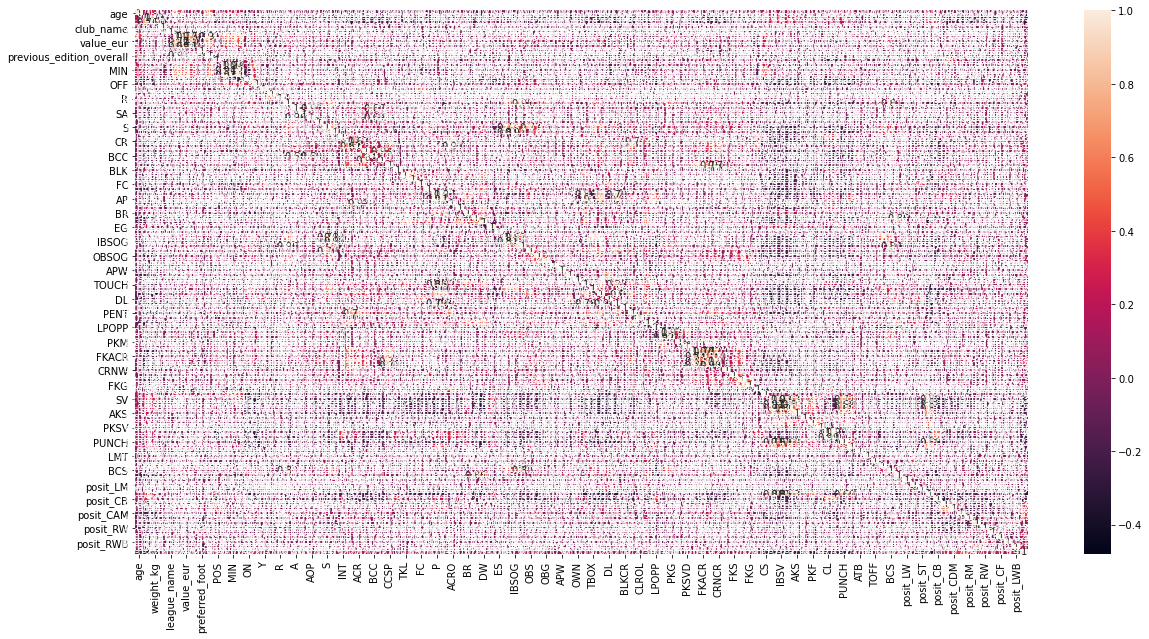

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [87]:
# Strong positive correlations
pd.set_option('display.max_rows',None)
df.corr().where(df.corr().ge(0.5)).stack()

age                       age                         1.000000
                          previous_edition_overall    0.514567
height_cm                 height_cm                   1.000000
                          weight_kg                   0.764969
weight_kg                 height_cm                   0.764969
                          weight_kg                   1.000000
club_name                 club_name                   1.000000
league_name               league_name                 1.000000
overall                   overall                     1.000000
                          value_eur                   0.724776
                          wage_eur                    0.693773
                          previous_edition_overall    0.913329
                          GP                          0.582674
                          MIN                         0.590542
                          ST                          0.589537
value_eur                 overall                     0

In [88]:
# Strong negative correlations
df.corr().where(df.corr().le(-0.5)).stack() # None

Series([], dtype: float64)

### Potential Strong Predictors
- Age, Wage, Value, Previous Ranking, Games Played, Minutes Played, and Starts seem to have strong correlations to the predicted variable ('Overall')

Text(0, 0.5, 'FIFA Ranking')

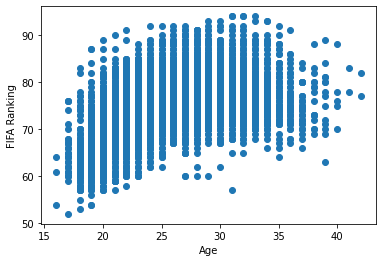

In [89]:
plt.scatter(x=df['age'],y=df['overall'])
plt.xlabel('Age')
plt.ylabel('FIFA Ranking')

Text(0, 0.5, 'FIFA Ranking')

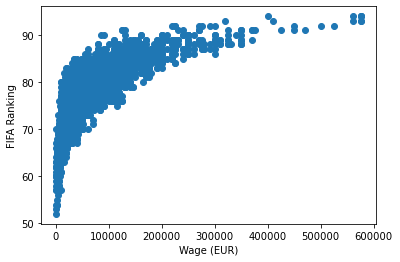

In [90]:
plt.scatter(x=df['wage_eur'],y=df['overall'])
plt.xlabel('Wage (EUR)')
plt.ylabel('FIFA Ranking')

Text(0, 0.5, 'FIFA Ranking')

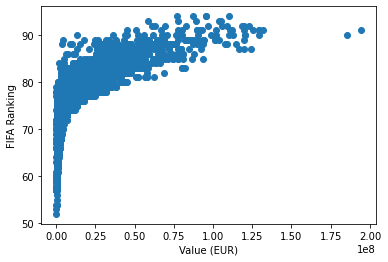

In [91]:
plt.scatter(x=df['value_eur'],y=df['overall'])
plt.xlabel('Value (EUR)')
plt.ylabel('FIFA Ranking')

Text(0, 0.5, 'FIFA Ranking')

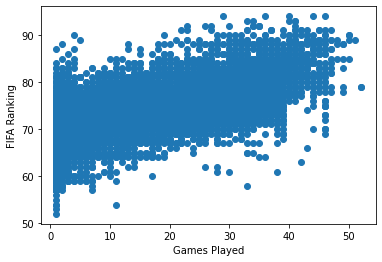

In [92]:
plt.scatter(x=df['GP'],y=df['overall'])
plt.xlabel('Games Played')
plt.ylabel('FIFA Ranking')

Text(0, 0.5, 'FIFA Ranking')

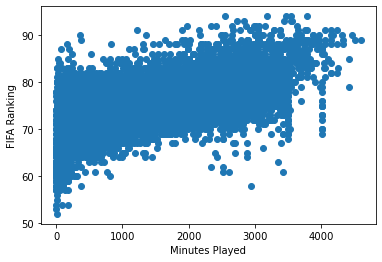

In [93]:
plt.scatter(x=df['MIN'],y=df['overall'])
plt.xlabel('Minutes Played')
plt.ylabel('FIFA Ranking')

Text(0, 0.5, 'FIFA Ranking')

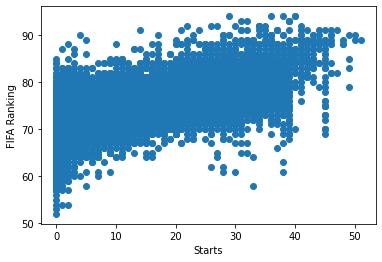

In [94]:
plt.scatter(x=df['ST'],y=df['overall'])
plt.xlabel('Starts')
plt.ylabel('FIFA Ranking')

### PCA

In [95]:
df.columns

Index(['Season_fifa', 'short_name', 'age', 'height_cm', 'weight_kg',
       'club_name', 'league_name', 'overall', 'value_eur', 'wage_eur',
       'preferred_foot', 'previous_edition_overall', 'POS', 'GP', 'MIN', 'ST',
       'ON', 'OFF', 'Y', 'YR', 'R', 'G', 'A', 'SA', 'AOP', 'ASP', 'S', 'SOG',
       'INT', 'CR', 'ACR', 'CC', 'BCC', 'CCOP', 'CCSP', 'BLK', 'TKL', 'TKLW',
       'FC', 'FS', 'P', 'AP', 'ACRO', 'AW', 'BR', 'DR', 'DW', 'EG', 'ES',
       'IBS', 'IBSOG', 'IBG', 'OBS', 'OBSOG', 'OBG', 'AOG', 'APW', 'DSP',
       'OWN', 'TOUCH', 'TBOX', 'PFT', 'DL', 'AFZP', 'BLKCR', 'PENT', 'CLROL',
       'POSL', 'LPOPP', 'PK', 'PKG', 'PKM', 'PKSVD', 'FKCR', 'FKACR', 'CRN',
       'CRNCR', 'CRNW', 'FKS', 'FKSOG', 'FKG', 'GC', 'CS', 'SV', 'IBSV',
       'OBSV', 'AKS', 'PKC', 'PKF', 'PKSV', 'CL', 'ECL', 'PUNCH', 'ALB', 'ATB',
       'LMT', 'TOFF', 'BCM', 'BCS', 'ATTDR', 'posit_LW', 'posit_LM',
       'posit_ST', 'posit_GK', 'posit_CB', 'posit_CM', 'posit_CDM',
       'posit_CAM', 'posit_RM', 

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows',None)

X = df.drop(['Season_fifa','short_name','overall'],axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(random_state=0)
pca.fit(X_scaled)

pd.DataFrame(list(zip(X.columns,np.round_(pca.explained_variance_ratio_,6))),
             columns=[['feature','explained_variance']])

,feature,explained_variance
0,age,0.099394
1,height_cm,0.061563
2,weight_kg,0.050923
3,club_name,0.044608
4,league_name,0.036394
5,value_eur,0.032603
6,wage_eur,0.025843
7,preferred_foot,0.023236
8,previous_edition_overall,0.021200
9,POS,0.019705


<AxesSubplot:>

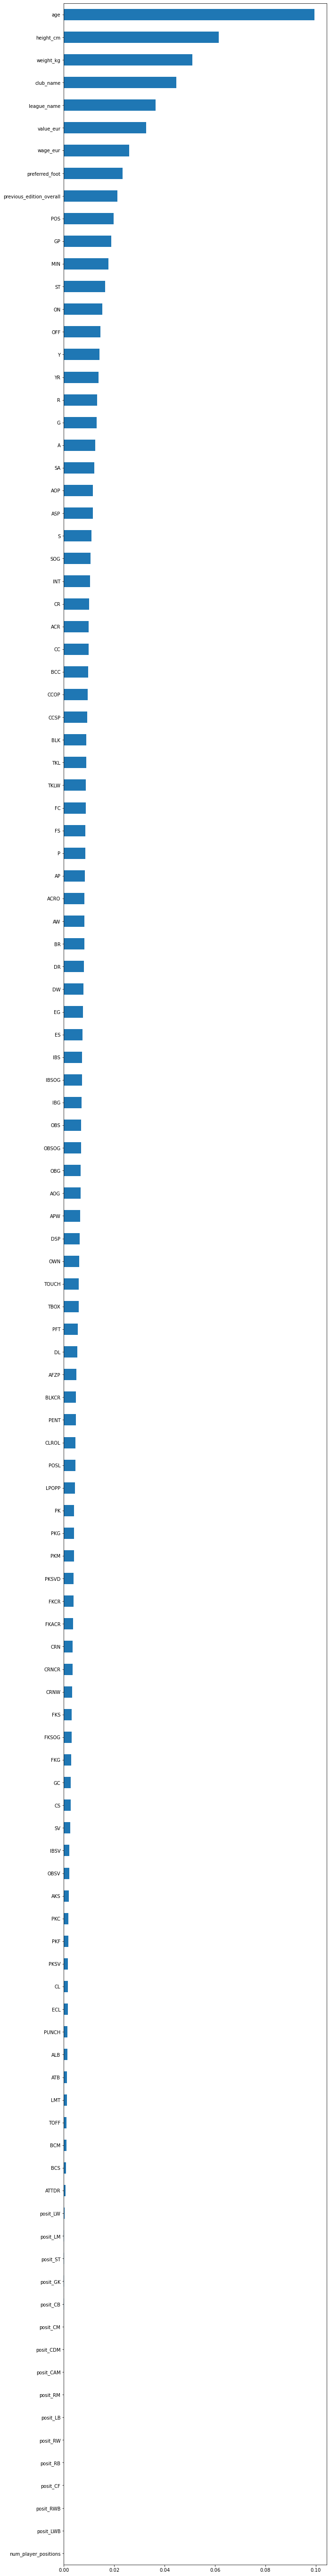

In [97]:
explained_variance = pd.Series(pca.explained_variance_ratio_, index=X.columns)
explained_variance.sort_values(ascending=True).plot(kind='barh',figsize=(10,100))

### Clustering

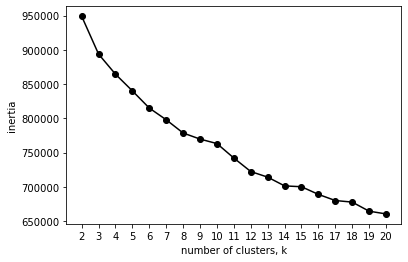

In [98]:
from sklearn.cluster import KMeans

ks = range(2, 21)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state=0)
    
    # Fit model to samples
    model.fit(pd.DataFrame(pca.fit_transform(X_scaled)))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [99]:
from sklearn.metrics import silhouette_score

n_list = []
score_list = []

for i in range(2,21):
    n_list.append(i)
    kmeans = KMeans(n_clusters =i,init = 'k-means++',random_state = 0)
    kmeans.fit_predict(pd.DataFrame(pca.fit_transform(X_scaled)))
    score = silhouette_score(pd.DataFrame(pca.fit_transform(X_scaled)), 
                             kmeans.labels_, metric='euclidean')
    score_list.append(score)

df_ss = pd.DataFrame(list(zip(n_list,score_list))).rename(columns={0:'n_clusters',1:'silhouette score'})\
.sort_values(by='silhouette score',ascending=False)

df_ss

,n_clusters,silhouette score
1,3,0.132517
3,5,0.128942
2,4,0.123462
0,2,0.108039
17,19,0.100195
13,15,0.099557
16,18,0.098061
14,16,0.097893
12,14,0.097563
6,8,0.088417


<AxesSubplot:xlabel='n_clusters'>

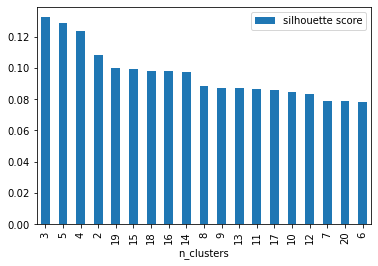

In [100]:
df_ss.plot(x='n_clusters',y='silhouette score',kind='bar')

In [101]:
kmeans = KMeans(n_clusters = 3,random_state = 0)
y_kmeans = kmeans.fit_predict(pd.DataFrame(pca.fit_transform(X_scaled)))

In [102]:
dfk = df.copy()
dfk['cluster'] = y_kmeans

Text(0.5, 1.0, 'K-Means 3 Clusters')

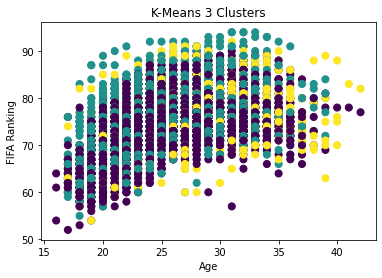

In [105]:
plt.scatter(dfk['age'],dfk['overall'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('FIFA Ranking')
plt.title('K-Means 3 Clusters')

Text(0.5, 1.0, 'K-Means 3 Clusters')

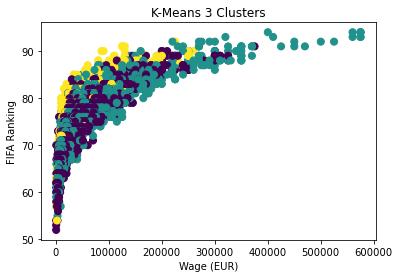

In [106]:
plt.scatter(dfk['wage_eur'],dfk['overall'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Wage (EUR)')
plt.ylabel('FIFA Ranking')
plt.title('K-Means 3 Clusters')

Text(0.5, 1.0, 'K-Means 3 Clusters')

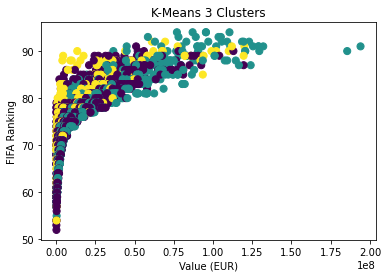

In [107]:
plt.scatter(dfk['value_eur'],dfk['overall'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Value (EUR)')
plt.ylabel('FIFA Ranking')
plt.title('K-Means 3 Clusters')

Text(0.5, 1.0, 'K-Means 3 Clusters')

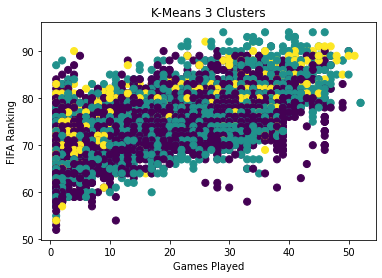

In [108]:
plt.scatter(dfk['GP'],dfk['overall'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Games Played')
plt.ylabel('FIFA Ranking')
plt.title('K-Means 3 Clusters')

Text(0.5, 1.0, 'K-Means 3 Clusters')

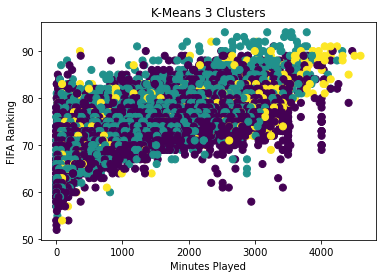

In [109]:
plt.scatter(dfk['MIN'],dfk['overall'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Minutes Played')
plt.ylabel('FIFA Ranking')
plt.title('K-Means 3 Clusters')

Text(0.5, 1.0, 'K-Means 3 Clusters')

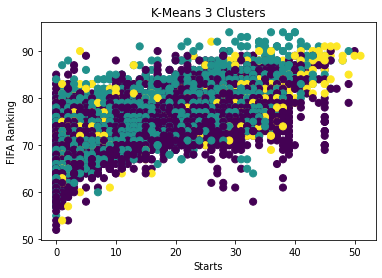

In [110]:
plt.scatter(dfk['ST'],dfk['overall'], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('Starts')
plt.ylabel('FIFA Ranking')
plt.title('K-Means 3 Clusters')

Cluster division doesn't seem quite distinctive, let's try evaluate more number of `k`

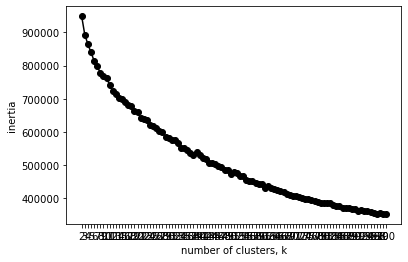

In [111]:
from sklearn.cluster import KMeans

ks = range(2, 101)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,random_state=0)
    
    # Fit model to samples
    model.fit(pd.DataFrame(pca.fit_transform(X_scaled)))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [112]:
from sklearn.metrics import silhouette_score

n_list = []
score_list = []

for i in range(2,101):
    n_list.append(i)
    kmeans = KMeans(n_clusters =i,init = 'k-means++',random_state = 0)
    kmeans.fit_predict(pd.DataFrame(pca.fit_transform(X_scaled)))
    score = silhouette_score(pd.DataFrame(pca.fit_transform(X_scaled)), 
                             kmeans.labels_, metric='euclidean')
    score_list.append(score)

df_ss = pd.DataFrame(list(zip(n_list,score_list))).rename(columns={0:'n_clusters',1:'silhouette score'})\
.sort_values(by='silhouette score',ascending=False)

df_ss.iloc[:11,:]

,n_clusters,silhouette score
1,3,0.132517
3,5,0.128942
2,4,0.123462
35,37,0.111138
0,2,0.108039
23,25,0.101008
17,19,0.100195
13,15,0.099557
16,18,0.098061
14,16,0.097893


k=3 still holds the highest silhouette score.

In [114]:
print('All sample:',len(y_kmeans))
print('Members of Cluster 0:',len(y_kmeans[y_kmeans==0]))
print('Members of Cluster 1:',len(y_kmeans[y_kmeans==1]))
print('Members of Cluster 2:',len(y_kmeans[y_kmeans==2]))

All sample: 8953
Members of Cluster 0: 4786
Members of Cluster 1: 3376
Members of Cluster 2: 791


In [115]:
dfk[dfk['cluster']==0].describe()

,age,height_cm,weight_kg,club_name,league_name,overall,value_eur,wage_eur,preferred_foot,previous_edition_overall,...,posit_CAM,posit_RM,posit_LB,posit_RW,posit_RB,posit_CF,posit_RWB,posit_LWB,num_player_positions,cluster
count,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4.786000e+03,4786.000000,4786.000000,4786.000000,...,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.000000,4786.0
mean,26.141454,182.982658,76.997493,66.729628,1.945466,74.809653,9.056522e+06,39288.121605,0.726912,73.948182,...,0.048684,0.065190,0.198287,0.032804,0.206435,0.008567,0.025282,0.030088,1.657125,0.0
std,4.286579,5.884318,6.543480,41.479217,1.393129,5.358254,1.063499e+07,38526.614808,0.445592,6.081872,...,0.215228,0.246887,0.398751,0.178142,0.404789,0.092169,0.156997,0.170847,0.687907,0.0
min,16.000000,165.000000,55.000000,0.000000,0.000000,52.000000,7.000000e+04,500.000000,0.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,23.000000,179.000000,73.000000,28.000000,1.000000,72.000000,2.700000e+06,17000.000000,0.000000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,26.000000,183.000000,77.000000,66.000000,2.000000,75.000000,6.000000e+06,30000.000000,1.000000,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0
75%,29.000000,187.000000,81.000000,102.000000,3.000000,78.000000,1.100000e+07,50000.000000,1.000000,78.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0
max,42.000000,201.000000,101.000000,141.000000,4.000000,91.000000,1.195000e+08,375000.000000,1.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.0


In [116]:
dfk[dfk['cluster']==1].describe()

,age,height_cm,weight_kg,club_name,league_name,overall,value_eur,wage_eur,preferred_foot,previous_edition_overall,...,posit_CAM,posit_RM,posit_LB,posit_RW,posit_RB,posit_CF,posit_RWB,posit_LWB,num_player_positions,cluster
count,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000,3376.000000,3376.000000,...,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.000000,3376.0
mean,25.567536,179.978969,74.277547,68.170024,1.915284,76.045024,1.412590e+07,51443.883294,0.746445,75.121742,...,0.247038,0.291765,0.025178,0.201126,0.022512,0.067832,0.037322,0.012441,1.989336,1.0
std,3.993721,6.004973,6.567280,40.617181,1.421712,5.557648,1.762880e+07,59228.914413,0.435110,6.181573,...,0.431353,0.454642,0.156688,0.400901,0.148363,0.251494,0.189578,0.110859,0.827601,0.0
min,17.000000,162.000000,56.000000,0.000000,0.000000,55.000000,1.600000e+05,550.000000,0.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,23.000000,176.000000,70.000000,34.000000,1.000000,73.000000,4.000000e+06,20000.000000,0.000000,72.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,25.000000,180.000000,74.000000,70.000000,2.000000,76.000000,8.500000e+06,31000.000000,1.000000,76.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.0
75%,28.000000,184.000000,78.000000,101.000000,3.000000,79.000000,1.650000e+07,60000.000000,1.000000,79.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.0
max,39.000000,201.000000,98.000000,141.000000,4.000000,94.000000,1.940000e+08,575000.000000,1.000000,94.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.0


In [117]:
dfk[dfk['cluster']==2].describe()

,age,height_cm,weight_kg,club_name,league_name,overall,value_eur,wage_eur,preferred_foot,previous_edition_overall,...,posit_CAM,posit_RM,posit_LB,posit_RW,posit_RB,posit_CF,posit_RWB,posit_LWB,num_player_positions,cluster
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,7.910000e+02,791.000000,791.000000,791.000000,...,791.000000,791.000000,791.000000,791.000000,791.000000,791.0,791.000000,791.000000,791.000000,791.0
mean,28.249052,189.135272,83.489254,65.936789,2.093552,76.934260,1.204714e+07,39006.953224,0.828066,76.027813,...,0.005057,0.003793,0.010114,0.001264,0.005057,0.0,0.001264,0.006321,1.036662,2.0
std,4.688248,4.704499,5.899330,42.279822,1.430711,6.172682,1.617043e+07,40990.701504,0.377562,6.637960,...,0.070977,0.061507,0.100121,0.035556,0.070977,0.0,0.035556,0.079304,0.261294,0.0
min,17.000000,172.000000,65.000000,0.000000,0.000000,54.000000,6.000000e+04,500.000000,0.000000,53.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.0
25%,25.000000,186.000000,80.000000,25.000000,1.000000,73.000000,2.150000e+06,15000.000000,1.000000,72.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.0
50%,28.000000,189.000000,83.000000,66.000000,2.000000,77.000000,6.500000e+06,28000.000000,1.000000,76.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.0
75%,31.000000,192.000000,88.000000,102.000000,3.000000,81.000000,1.600000e+07,48000.000000,1.000000,81.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.0
max,42.000000,202.000000,99.000000,141.000000,4.000000,92.000000,1.200000e+08,260000.000000,1.000000,92.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,4.000000,2.0
